### Different Model Validation

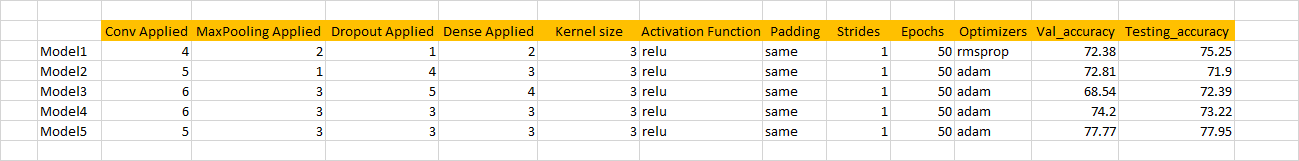

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
cifar10_data = tf.keras.datasets.cifar10

In [3]:
(X_train,y_train),(X_test,y_test) = cifar10_data.load_data()

print(f"the size of train :{len(X_train)}")
print(f"the size of test :{len(X_test)}")

the size of train :50000
the size of test :10000


visualization

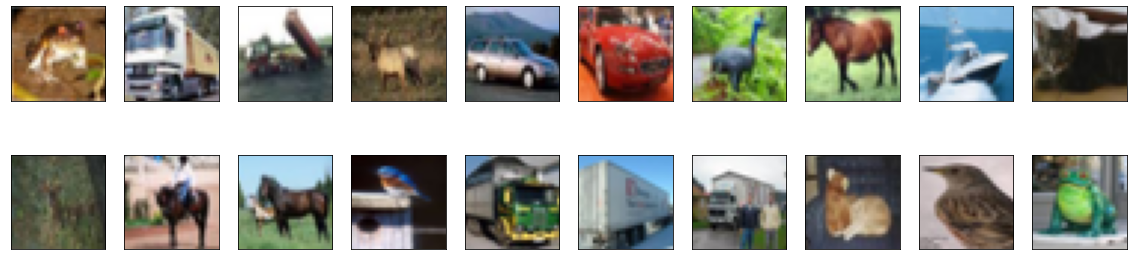

In [4]:
fig = plt.figure(figsize=(20,5))

for i in range(20):
  ax = fig.add_subplot(2,10,i+1,xticks=[],yticks=[])
  ax.imshow(np.squeeze(X_train[i]))

## Rescale the Images

In [5]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

### Break Dataset into Training, Testing, and Validation Sets

In [6]:
num_classes = len(np.unique(y_train))



In [7]:
from keras.utils import np_utils

# one-hot encode the labels
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)

# break training set into training and validation sets

x_train , x_valid = X_train[5000:], X_train[:5000]
y_train , y_valid = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')


x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


##Defining the Model Architecture

###Model1

In [8]:
model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation ='relu' ,input_shape=(32,32,3)))
model1.add(tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding='same',activation ='relu'))
model1.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model1.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model1.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model1.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model1.add(tf.keras.layers.Dropout(rate=0.2))
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(units=32,activation='relu'))
model1.add(tf.keras.layers.Dense(units=10,activation='softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        4624      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        9280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 64)          0

In [9]:
## compile the model
model1.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [10]:
## creating checkpoints
from tensorflow.keras.callbacks import ModelCheckpoint   

## train the model

chkpointer = ModelCheckpoint(filepath='model1.weights.best.hdf5', verbose=1, save_best_only=True)

history1 = model1.fit(x_train,y_train,batch_size=32,epochs=50,validation_data=(X_test,y_test),callbacks=[chkpointer],verbose=2,shuffle=True)


Epoch 1/50
1407/1407 - 38s - loss: 1.5310 - accuracy: 0.4450 - val_loss: 1.3775 - val_accuracy: 0.5100

Epoch 00001: val_loss improved from inf to 1.37746, saving model to model1.weights.best.hdf5
Epoch 2/50
1407/1407 - 7s - loss: 1.0581 - accuracy: 0.6299 - val_loss: 1.0080 - val_accuracy: 0.6553

Epoch 00002: val_loss improved from 1.37746 to 1.00797, saving model to model1.weights.best.hdf5
Epoch 3/50
1407/1407 - 7s - loss: 0.8777 - accuracy: 0.6971 - val_loss: 0.9082 - val_accuracy: 0.6852

Epoch 00003: val_loss improved from 1.00797 to 0.90824, saving model to model1.weights.best.hdf5
Epoch 4/50
1407/1407 - 7s - loss: 0.7685 - accuracy: 0.7320 - val_loss: 0.7963 - val_accuracy: 0.7278

Epoch 00004: val_loss improved from 0.90824 to 0.79634, saving model to model1.weights.best.hdf5
Epoch 5/50
1407/1407 - 7s - loss: 0.6978 - accuracy: 0.7575 - val_loss: 0.7866 - val_accuracy: 0.7347

Epoch 00005: val_loss improved from 0.79634 to 0.78655, saving model to model1.weights.best.hdf5
Epo

In [11]:
# load the weights that yielded the best validation accuracy
model1.load_weights('model1.weights.best.hdf5')

In [12]:
# evaluate test accuracy
score = model1.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 75.2500%


###Model2

In [13]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation ='relu' ,input_shape=(32,32,3)))
model2.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model2.add(tf.keras.layers.Dropout(rate=0.3))
model2.add(tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu'))
model2.add(tf.keras.layers.Dropout(rate=0.3))
model2.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model2.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model2.add(tf.keras.layers.Dropout(rate=0.4))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(units=32,activation='relu'))
model2.add(tf.keras.layers.Dense(units=64,activation='relu'))
model2.add(tf.keras.layers.Dropout(rate=0.4))
model2.add(tf.keras.layers.Dense(units=10,activation='softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 128)       36992     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 16)        18448     
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 64)        9280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)       

In [14]:
## compile the model
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
## creating checkpoints
from tensorflow.keras.callbacks import ModelCheckpoint   

## train the model

chkpointer = ModelCheckpoint(filepath='model2.weights.best.hdf5', verbose=1, save_best_only=True)

history2 = model2.fit(x_train,y_train,batch_size=32,epochs=50,validation_data=(X_test,y_test),callbacks=[chkpointer],verbose=2,shuffle=True)


Epoch 1/50
1407/1407 - 14s - loss: 1.8944 - accuracy: 0.2866 - val_loss: 1.6010 - val_accuracy: 0.4194

Epoch 00001: val_loss improved from inf to 1.60098, saving model to model2.weights.best.hdf5
Epoch 2/50
1407/1407 - 12s - loss: 1.5441 - accuracy: 0.4290 - val_loss: 1.4241 - val_accuracy: 0.4743

Epoch 00002: val_loss improved from 1.60098 to 1.42406, saving model to model2.weights.best.hdf5
Epoch 3/50
1407/1407 - 12s - loss: 1.3816 - accuracy: 0.4986 - val_loss: 1.2993 - val_accuracy: 0.5294

Epoch 00003: val_loss improved from 1.42406 to 1.29931, saving model to model2.weights.best.hdf5
Epoch 4/50
1407/1407 - 12s - loss: 1.2762 - accuracy: 0.5407 - val_loss: 1.2112 - val_accuracy: 0.5678

Epoch 00004: val_loss improved from 1.29931 to 1.21124, saving model to model2.weights.best.hdf5
Epoch 5/50
1407/1407 - 12s - loss: 1.1980 - accuracy: 0.5738 - val_loss: 1.2710 - val_accuracy: 0.5566

Epoch 00005: val_loss did not improve from 1.21124
Epoch 6/50
1407/1407 - 12s - loss: 1.1275 - a

In [16]:
# load the weights that yielded the best validation accuracy
model2.load_weights('model2.weights.best.hdf5')

In [17]:
# evaluate test accuracy
score = model2.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 71.9000%


###Model3

In [18]:
model3 = tf.keras.models.Sequential()
model3.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation ='relu' ,input_shape=(32,32,3)))
model3.add(tf.keras.layers.Dropout(rate=0.3))
model3.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model3.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model3.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model3.add(tf.keras.layers.Dropout(rate=0.3))
model3.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model3.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))
model3.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model3.add(tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'))
model3.add(tf.keras.layers.Dropout(rate=0.3))
model3.add(tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu'))
model3.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(units=32,activation='relu'))
model3.add(tf.keras.layers.Dropout(rate=0.3))
model3.add(tf.keras.layers.Dense(units=64,activation='relu'))
model3.add(tf.keras.layers.Dropout(rate=0.4))
model3.add(tf.keras.layers.Dense(units=512,activation='relu'))
model3.add(tf.keras.layers.Dense(units=10,activation='softmax'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 128)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 128)        

In [19]:
## compile the model
model3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
## creating checkpoints
from tensorflow.keras.callbacks import ModelCheckpoint   

## train the model

chkpointer = ModelCheckpoint(filepath='model3.weights.best.hdf5', verbose=1, save_best_only=True)

history3 = model3.fit(x_train,y_train,batch_size=32,epochs=50,validation_data=(X_test,y_test),callbacks=[chkpointer],verbose=2,shuffle=True)


Epoch 1/50
1407/1407 - 13s - loss: 1.9543 - accuracy: 0.2433 - val_loss: 1.7453 - val_accuracy: 0.3390

Epoch 00001: val_loss improved from inf to 1.74529, saving model to model3.weights.best.hdf5
Epoch 2/50
1407/1407 - 11s - loss: 1.6812 - accuracy: 0.3525 - val_loss: 1.6251 - val_accuracy: 0.3767

Epoch 00002: val_loss improved from 1.74529 to 1.62513, saving model to model3.weights.best.hdf5
Epoch 3/50
1407/1407 - 11s - loss: 1.5259 - accuracy: 0.4306 - val_loss: 1.3959 - val_accuracy: 0.4923

Epoch 00003: val_loss improved from 1.62513 to 1.39590, saving model to model3.weights.best.hdf5
Epoch 4/50
1407/1407 - 11s - loss: 1.4064 - accuracy: 0.4886 - val_loss: 1.3647 - val_accuracy: 0.5056

Epoch 00004: val_loss improved from 1.39590 to 1.36468, saving model to model3.weights.best.hdf5
Epoch 5/50
1407/1407 - 11s - loss: 1.3264 - accuracy: 0.5221 - val_loss: 1.2731 - val_accuracy: 0.5639

Epoch 00005: val_loss improved from 1.36468 to 1.27311, saving model to model3.weights.best.hdf5

In [21]:
# load the weights that yielded the best validation accuracy
model3.load_weights('model3.weights.best.hdf5')

In [22]:
# evaluate test accuracy
score = model3.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 72.3900%


###Model4

In [32]:
model4 = tf.keras.models.Sequential()
model4.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation ='relu' ,input_shape=(32,32,3)))
model4.add(tf.keras.layers.Dropout(rate=0.2))
model4.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model4.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))
model4.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model4.add(tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu'))
model4.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model4.add(tf.keras.layers.Dropout(rate=0.2))
model4.add(tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu'))
model4.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model4.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model4.add(tf.keras.layers.Flatten())
model4.add(tf.keras.layers.Dense(units=32,activation='relu'))
model4.add(tf.keras.layers.Dense(units=64,activation='relu'))
model4.add(tf.keras.layers.Dropout(rate=0.5))
model4.add(tf.keras.layers.Dense(units=10,activation='softmax'))
model4.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_25 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 32, 32, 32)        18464     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 16, 16, 16)        4624      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 8, 8, 16)         

In [33]:
## compile the model
model4.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [34]:
## creating checkpoints
from tensorflow.keras.callbacks import ModelCheckpoint   

## train the model

chkpointer = ModelCheckpoint(filepath='model4.weights.best.hdf5', verbose=1, save_best_only=True)

history4 = model4.fit(x_train,y_train,batch_size=32,epochs=50,validation_data=(X_test,y_test),callbacks=[chkpointer],verbose=2,shuffle=True)


Epoch 1/50
1407/1407 - 8s - loss: 1.8680 - accuracy: 0.2991 - val_loss: 1.5997 - val_accuracy: 0.4263

Epoch 00001: val_loss improved from inf to 1.59966, saving model to model4.weights.best.hdf5
Epoch 2/50
1407/1407 - 8s - loss: 1.5270 - accuracy: 0.4421 - val_loss: 1.3880 - val_accuracy: 0.4994

Epoch 00002: val_loss improved from 1.59966 to 1.38798, saving model to model4.weights.best.hdf5
Epoch 3/50
1407/1407 - 7s - loss: 1.3793 - accuracy: 0.5032 - val_loss: 1.2760 - val_accuracy: 0.5403

Epoch 00003: val_loss improved from 1.38798 to 1.27604, saving model to model4.weights.best.hdf5
Epoch 4/50
1407/1407 - 7s - loss: 1.2668 - accuracy: 0.5462 - val_loss: 1.1344 - val_accuracy: 0.5921

Epoch 00004: val_loss improved from 1.27604 to 1.13439, saving model to model4.weights.best.hdf5
Epoch 5/50
1407/1407 - 8s - loss: 1.1887 - accuracy: 0.5822 - val_loss: 1.0493 - val_accuracy: 0.6290

Epoch 00005: val_loss improved from 1.13439 to 1.04932, saving model to model4.weights.best.hdf5
Epoc

In [35]:
# load the weights that yielded the best validation accuracy
model4.load_weights('model4.weights.best.hdf5')

In [36]:
# evaluate test accuracy
score = model4.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 73.2200%


###Model5

In [40]:
model5 = tf.keras.models.Sequential()
model5.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation ='relu' ,input_shape=(32,32,3)))
model5.add(tf.keras.layers.Dropout(rate=0.2))
model5.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model5.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model5.add(tf.keras.layers.Dropout(rate=0.2))
model5.add(tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'))
model5.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model5.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))
model5.add(tf.keras.layers.Dropout(rate=0.2))
model5.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model5.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model5.add(tf.keras.layers.Conv2D(filters=4,kernel_size=(3,3),padding='same',activation='relu'))
model5.add(tf.keras.layers.Flatten())
model5.add(tf.keras.layers.Dense(units=32,activation='relu'))
model5.add(tf.keras.layers.Dense(units=16,activation='relu'))
model5.add(tf.keras.layers.Dense(units=10,activation='softmax'))
model5.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_32 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 16, 16, 256)       147712    
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 8, 8, 256)        

In [41]:
## compile the model
model5.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [42]:
## creating checkpoints
from tensorflow.keras.callbacks import ModelCheckpoint   

## train the model

chkpointer = ModelCheckpoint(filepath='model5.weights.best.hdf5', verbose=1, save_best_only=True)

history5 = model5.fit(x_train,y_train,batch_size=32,epochs=50,validation_data=(X_test,y_test),callbacks=[chkpointer],verbose=2,shuffle=True)


Epoch 1/50
1407/1407 - 9s - loss: 1.8421 - accuracy: 0.3134 - val_loss: 1.5421 - val_accuracy: 0.4214

Epoch 00001: val_loss improved from inf to 1.54213, saving model to model5.weights.best.hdf5
Epoch 2/50
1407/1407 - 8s - loss: 1.4179 - accuracy: 0.4811 - val_loss: 1.3392 - val_accuracy: 0.5183

Epoch 00002: val_loss improved from 1.54213 to 1.33918, saving model to model5.weights.best.hdf5
Epoch 3/50
1407/1407 - 8s - loss: 1.2131 - accuracy: 0.5605 - val_loss: 1.1688 - val_accuracy: 0.5876

Epoch 00003: val_loss improved from 1.33918 to 1.16884, saving model to model5.weights.best.hdf5
Epoch 4/50
1407/1407 - 8s - loss: 1.0863 - accuracy: 0.6075 - val_loss: 1.0834 - val_accuracy: 0.6162

Epoch 00004: val_loss improved from 1.16884 to 1.08343, saving model to model5.weights.best.hdf5
Epoch 5/50
1407/1407 - 8s - loss: 0.9925 - accuracy: 0.6432 - val_loss: 0.9880 - val_accuracy: 0.6588

Epoch 00005: val_loss improved from 1.08343 to 0.98797, saving model to model5.weights.best.hdf5
Epoc

In [43]:
# load the weights that yielded the best validation accuracy
model5.load_weights('model5.weights.best.hdf5')

In [44]:
# evaluate test accuracy
score = model5.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 77.9500%
